<a href="https://colab.research.google.com/github/TaherBenAfia/MyWebSite/blob/main/SoilGapPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Nutrient Gaps: **

## **Introduction**

Welcome! This notebook will guide you through the process of building a machine learning model to predict nutrient gaps in soil.
We'll cover data loading, exploratory data analysis (EDA), feature preprocessing, model training, evaluation, and submission.

### **What You Will Learn**

- How to load and inspect data in Python using `pandas`
- How to explore data with visualizations using `matplotlib` and `seaborn`
- How to preprocess data for machine learning
- How to train a simple machine learning model using `scikit-learn`
- How to evaluate model performance
- How to generate and save predictions for submission

#### **Additional Reading for Beginners**

- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Seaborn Visualization Guide](https://seaborn.pydata.org/tutorial.html)
- [Scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html)

Let's get started! 🚀


## **Step 1: Load the Data**

We begin by loading the training and test datasets using `pandas`. The dataset consists of different features, with `pH` as the target variable in the training data.

### **Tips for Beginners**

- The `train.csv` file contains both the features and the target variable (`pH`).
- The `test.csv` file contains only the features (we need to predict `pH` for these).
- Always check the first few rows of the dataset using `.head()` to understand its structure.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## **Step 2: Exploratory Data Analysis (EDA)**

EDA helps us understand the data better before building a model.

### **Why is EDA Important?**
- It reveals patterns, trends, and potential issues in the data.
- It helps us decide which preprocessing steps are needed.
- It allows us to visualize relationships between variables.

### **Tips for Beginners**
- Always check for missing values and outliers.
- Use histograms to see the distribution of numerical features.
- Correlation heatmaps can help identify which features are most relevant.

Let's explore the data! 📊


In [ ]:
# Load datasets
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Train.csv"

# Load the latest version
df1 = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "muhammadqasimshabbir/amini-soil-prediction-challenge-dataset",
  file_path,
)
file_path1 = "Test.csv"

# Load the latest version
df2 = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "muhammadqasimshabbir/amini-soil-prediction-challenge-dataset",
  file_path1,
)
file_path2 = "Gap_Train.csv"

# Load the latest version
df3 = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "muhammadqasimshabbir/amini-soil-prediction-challenge-dataset",
  file_path2,
)
file_path3 = "Gap_Test.csv"

# Load the latest version
df4 = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "muhammadqasimshabbir/amini-soil-prediction-challenge-dataset",
  file_path3,
)
file_path4 = "SampleSubmission.csv"

# Load the latest version
df5 = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "muhammadqasimshabbir/amini-soil-prediction-challenge-dataset",
  file_path4,
)
file_path5 = "Sentinel1_data.csv"

# Load the latest version
df6 = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "muhammadqasimshabbir/amini-soil-prediction-challenge-dataset",
  file_path5,
)


In [ ]:
train_df = df1.copy()
test_df = df2.copy()
train_gap_df = df3.copy()
test_gap_df = df4.copy()
sample_submission = df5.copy()
sen1 = df6.copy()
big_df_dedup = sen1.drop_duplicates(subset='PID', keep='first')
merged_df = train_df.merge(big_df_dedup, on='PID', how='left')
merged_df_t = test_df.merge(big_df_dedup, on='PID', how='left')


In [ ]:
train_df.head()
print(merged_df.shape)
print(merged_df.head())
train_df = merged_df.copy()
test_df = merged_df_t.copy()
train_df.columns

(7744, 52)
             site        PID      lon_x      lat_x    pH  alb  bio1  bio12  \
0  site_id_bIEHwl  ID_I5RGjv  70.603761  46.173798  7.75  176   248    920   
1  site_id_nGvnKc  ID_8jWzJ5  70.590479  46.078924  7.10  181   250   1080   
2  site_id_nGvnKc  ID_UgzkN8  70.582553  46.048820  6.95  188   250   1109   
3  site_id_nGvnKc  ID_DLLHM9  70.573267  46.021910  7.83  174   250   1149   
4  site_id_7SA9rO  ID_d009mj  70.585330  46.204336  8.07  188   250    869   

   bio15  bio7  ...    Cu     B         VH         VV        date  \
0    108   190  ...  2.98  0.24 -16.074987  -7.521530  2017-01-20   
1    113   191  ...  4.32  0.10 -19.300965  -8.880402  2017-01-20   
2    111   191  ...  1.24  0.22 -12.172401 -10.541467  2017-01-20   
3    112   191  ...  3.08  0.87 -13.460991  -5.946425  2017-01-20   
4    114   191  ...  3.03  0.31 -19.381171 -13.886840  2017-01-20   

   instrumentMode      lat_y      lon_y  orbitProperties_pass  \
0              IW  46.173820  70.603684 

Index(['site', 'PID', 'lon_x', 'lat_x', 'pH', 'alb', 'bio1', 'bio12', 'bio15',
       'bio7', 'bp', 'cec20', 'dows', 'ecec20', 'hp20', 'ls', 'lstd', 'lstn',
       'mb1', 'mb2', 'mb3', 'mb7', 'mdem', 'para', 'parv', 'ph20', 'slope',
       'snd20', 'soc20', 'tim', 'wp', 'xhp20', 'BulkDensity', 'N', 'P', 'K',
       'Ca', 'Mg', 'S', 'Fe', 'Mn', 'Zn', 'Cu', 'B', 'VH', 'VV', 'date',
       'instrumentMode', 'lat_y', 'lon_y', 'orbitProperties_pass',
       'relativeOrbitNumber_start'],
      dtype='object')

In [ ]:
train_df.isnull().sum()

,0
site,0
PID,0
lon_x,0
lat_x,0
pH,0
alb,0
bio1,0
bio12,0
bio15,0
bio7,0


In [ ]:

train_df["VV/VH"] = train_df["VV"] / train_df["VH"]
train_df["VH_minus_VV"] = train_df["VH"] - train_df["VV"]
train_df["VH_plus_VV"] = train_df["VH"] + train_df["VV"]


In [ ]:
test_df["VV/VH"] = test_df["VV"] / test_df["VH"]
test_df["VH_minus_VV"] = test_df["VH"] - test_df["VV"]
test_df["VH_plus_VV"] = test_df["VH"] + test_df["VV"]

In [ ]:
train_df['instrumentMode'].unique()

array(['IW'], dtype=object)

In [ ]:
train_df= train_df.drop(columns=['orbitProperties_pass'])
test_df=test_df.drop(columns=['orbitProperties_pass'])
train_df = train_df.drop(columns=['instrumentMode'])
test_df= test_df.drop(columns=['instrumentMode'])

In [ ]:


import pandas as pd
train_df['date'] = pd.to_datetime(train_df['date'], format='%Y-%m-%d')

def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'
train_df['Season'] = train_df['date'].dt.month.apply(get_season)

from sklearn.preprocessing import LabelEncoder
def Encoder(label_column,df):
    le = LabelEncoder()
    df[label_column+"_"+"encoded"] = le.fit_transform(df[label_column])
test_df['date'] = pd.to_datetime(test_df['date'],format ='%Y-%m-%d')
test_df['Season'] = test_df['date'].dt.month.apply(get_season)
test_df = test_df.drop(columns=['date'])
train_df = train_df.drop(columns=['date'])
Encoder(label_column='Season',df=train_df)
Encoder(label_column='Season',df=test_df)

In [ ]:
train_df = train_df.drop(columns=['Season'])
test_df = test_df.drop(columns = ['Season'])

In [ ]:
train_df['bio1_bio12_ratio'] = train_df['bio1'] / (train_df['bio12'] + 1)
train_df['bio_temp_range_per_rain'] = train_df['bio7'] / (train_df['bio12'] + 1)
train_df['rain_variability_temp_ratio'] = train_df['bio15'] / (train_df['bio1'] + 1)

In [ ]:
test_df['bio1_bio12_ratio'] = test_df['bio1'] / (test_df['bio12'] + 1)
test_df['bio_temp_range_per_rain'] = test_df['bio7'] / (test_df['bio12'] + 1)
test_df['rain_variability_temp_ratio'] = test_df['bio15'] / (test_df['bio1'] + 1)

In [ ]:
train_gap_df.head()

,Nutrient,Required,Available,Gap,PID
0,N,100.0,3796.0000,-3696.0000,ID_I5RGjv
1,P,40.0,0.9928,39.0072,ID_I5RGjv
2,K,52.0,429.2400,-377.2400,ID_I5RGjv
3,Ca,12.0,19943.6000,-19931.6000,ID_I5RGjv
4,Mg,8.0,6745.2000,-6737.2000,ID_I5RGjv


In [ ]:
test_gap_df = pd.merge(test_gap_df, test_df[['PID', 'BulkDensity']], on='PID', how='left')

In [ ]:
test_gap_df.head()

,Nutrient,Required,PID,BulkDensity
0,N,100.0,ID_NGS9Bx,1.2
1,P,40.0,ID_NGS9Bx,1.2
2,K,52.0,ID_NGS9Bx,1.2
3,Ca,12.0,ID_NGS9Bx,1.2
4,Mg,8.0,ID_NGS9Bx,1.2


In [ ]:
sample_submission.head()

,ID,Gap
0,ID_002W8m_B,0
1,ID_002W8m_Ca,0
2,ID_002W8m_Cu,0
3,ID_002W8m_Fe,0
4,ID_002W8m_K,0


## **Step 3: Feature Selection & Preprocessing**

Feature selection and preprocessing are essential to ensure that the data is suitable for training a model.

### **Why is Preprocessing Important?**
- It standardizes data for better model performance.
- It handles missing values and categorical variables.
- It ensures the model learns patterns effectively.

### **Key Steps in Preprocessing**
- **Scaling**: Standardizes numerical features to a common range.
- **Feature Selection**: Choosing relevant features for the model.

### **Additional Reading**
- [Feature Scaling in Machine Learning](https://scikit-learn.org/stable/modules/preprocessing.html)


In [ ]:
# Display basic info
print("Train Data Info:")
print(train_df.info())
print("\nTest Data Info:")
print(test_df.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7744 entries, 0 to 7743
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   site                         7744 non-null   object 
 1   PID                          7744 non-null   object 
 2   lon_x                        7744 non-null   float64
 3   lat_x                        7744 non-null   float64
 4   pH                           7744 non-null   float64
 5   alb                          7744 non-null   int64  
 6   bio1                         7744 non-null   int64  
 7   bio12                        7744 non-null   int64  
 8   bio15                        7744 non-null   int64  
 9   bio7                         7744 non-null   int64  
 10  bp                           7744 non-null   float64
 11  cec20                        7744 non-null   float64
 12  dows                         7744 non-null   float64
 13  e

In [ ]:
# prompt: input missing values in train_df and test_df with the mean, only do it for columns that have missing values

# Fill missing values with the mean for columns with missing values in train_df
for column in train_df.columns:
  if train_df[column].isnull().any():
    train_df[column].fillna(train_df[column].mean(), inplace=True)

# Fill missing values with the mean for columns with missing values in test_df
for column in test_df.columns:
  if test_df[column].isnull().any():
    test_df[column].fillna(test_df[column].mean(), inplace=True)


## **Step 4: Model Training**

Now, we train a Random Forest model. A **Random Forest** is an ensemble learning method that combines multiple decision trees to improve accuracy.

### **Tips for Beginners**
- More trees (`n_estimators`) generally improve accuracy but increase computation time.
- Setting a `random_state` ensures reproducibility of results.
- Always evaluate the model on a validation set before making predictions.

### **Additional Reading**
- [Random Forest Regressor in Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)


## **Step 5: Model Evaluation**

After training the model, we evaluate it using **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE)**.

### **Why Evaluate a Model?**
- It helps understand how well the model generalizes to unseen data.
- Lower error values indicate a better model.

### **Tips for Beginners**
- Use multiple metrics (e.g., MAE, RMSE) to get a comprehensive view of model performance.
- If errors are high, consider trying different algorithms or tuning hyperparameters.

### **Additional Reading**
- [Evaluation Metrics for Regression](https://scikit-learn.org/stable/modules/model_evaluation.html)


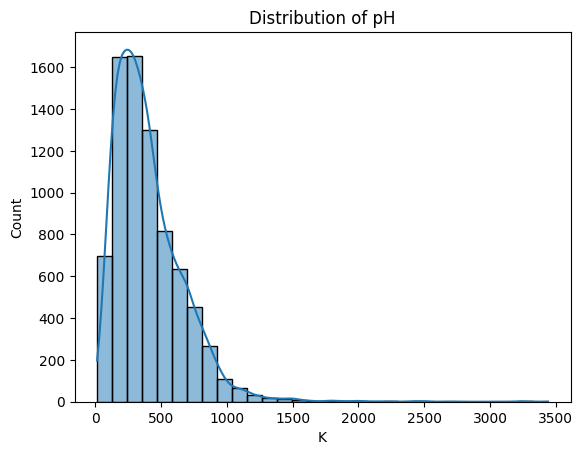

In [ ]:
# Basic EDA
sns.histplot(train_df['K'], bins=30, kde=True)
plt.title('Distribution of pH')
plt.show()

# Step 6: Let's model ⏳

In [ ]:
target_columns = ['N', 'P', 'K', 'Ca', 'Mg', 'S', 'Fe', 'Mn', 'Zn', 'Cu', 'B']

In [ ]:
# Feature selection
X = train_df.drop(columns=target_columns)
y = train_df[target_columns]
X_test = test_df.drop(columns=['PID',"site"])

In [ ]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.drop(columns=['PID','site'])
X_val = X_val.drop(columns=['PID','site'])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
import numpy as np
import pandas as pd

# Normalize features
pre_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,

)
model = MultiOutputRegressor(pre_model)

model.fit(X_train, y_train)

# Predict
y_pr = model.predict(X_test)


In [ ]:
# Predict on validation set
y_pred = model.predict(X_val)

In [ ]:
# Evaluate model
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae:.4f}, RMSE: {rmse:.4f}')

MAE: 159.7944, RMSE: 480.9725


## **Step 7: Generate Predictions & Submission File**

Finally, we use our trained model to generate predictions for the test dataset and save them in a CSV file.

### **Why Save Predictions?**
- Predictions are needed for submission to competitions or practical applications.
- The submission format must match the required structure.

### **Tips for Beginners**
- Ensure the column names match the required format.
- Use `to_csv(index=False)` to avoid adding unnecessary row indices.




In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
# Split the predictions into separate columns
N_pred =  test_predictions[:, 0]  # Predictions for N
P_pred =  test_predictions[:, 1]  # Predictions for P
K_pred =  test_predictions[:, 2]  # Predictions for K
Ca_pred = test_predictions[:, 3]  # Predictions for Ca
Mg_pred = test_predictions[:, 4]  # Predictions for Mg
S_pred =  test_predictions[:, 5]  # Predictions for S
Fe_pred = test_predictions[:, 6]  # Predictions for Fe
Mn_pred = test_predictions[:, 7]  # Predictions for Mn
Zn_pred = test_predictions[:, 8]  # Predictions for Zn
Cu_pred = test_predictions[:, 9]  # Predictions for Cu
B_pred =  test_predictions[:, 10]  # Predictions for B


In [ ]:
submission = pd.DataFrame({'PID': test_df['PID'], 'N': N_pred, 'P': P_pred, 'K': K_pred, 'Ca': Ca_pred, 'Mg': Mg_pred, 'S': S_pred, 'Fe': Fe_pred, 'Mn': Mn_pred, 'Zn': Zn_pred, 'Cu': Cu_pred, 'B': B_pred})
submission.head()

,PID,N,P,K,Ca,Mg,S,Fe,Mn,Zn,Cu,B
0,ID_NGS9Bx,1622.9,12.8689,179.17,5536.15,1696.25,9.5483,120.695,136.04,1.8245,4.1843,0.2066
1,ID_YdVKXw,1360.2,8.3190,188.84,6394.66,2256.57,9.9248,134.099,153.80,1.2093,4.7188,0.2021
2,ID_MZAlfE,1775.4,3.1800,184.67,5307.78,1862.24,9.2336,146.211,145.17,1.6694,4.4668,0.2310
3,ID_GwCCMN,1639.3,2.9396,161.42,5460.61,1795.31,10.2972,142.657,148.37,1.8325,4.0250,0.2368
4,ID_K8sowf,1569.8,5.1309,193.90,5524.95,1343.32,8.7627,123.943,133.46,1.8509,4.3856,0.1850


In [ ]:
# prompt: turn submission into a 3 column file that has the column PID, Nutrient, Value

submission_melted = submission.melt(id_vars=['PID'], var_name='Nutrient', value_name='Available_Nutrients_in_ppm')
submission_melted = submission_melted.sort_values('PID')
submission_melted.head()

,PID,Nutrient,Available_Nutrients_in_ppm
19869,ID_002W8m,Zn,2.9280
15033,ID_002W8m,Fe,179.6200
2943,ID_002W8m,P,11.3015
24705,ID_002W8m,B,0.3800
525,ID_002W8m,N,2254.6000


# Calculate the nutrient gaps

Transform your predicted ppm values to available nutrients (kg/ha) to determine the nutrient gaps.

We are determining the nutrients needed for Maize crops to yeild 4 tons/ha at a depth of 20cm.

Available nutrients are calculated by

`Available (kg/ha) = ppm × soil depth (cm) × bulk density (g/cm³) × 0.1`

In [ ]:
# prompt: merge test_gap_df with submission_melted on PID and Nutrient
nutrient_df = pd.merge(test_gap_df, submission_melted, on=['PID', 'Nutrient'], how='left')


In [ ]:
soil_depth = 20  # cm

# Calculate the Available_Nutrients_in_kg_ha
nutrient_df['Available_Nutrients_in_kg_ha'] = (nutrient_df['Available_Nutrients_in_ppm']
                                               * soil_depth * nutrient_df['BulkDensity'] * 0.1)

In [ ]:
nutrient_df.head()

,Nutrient,Required,PID,BulkDensity,Available_Nutrients_in_ppm,Available_Nutrients_in_kg_ha
0,N,100.0,ID_NGS9Bx,1.2,1622.9000,3894.96000
1,P,40.0,ID_NGS9Bx,1.2,12.8689,30.88536
2,K,52.0,ID_NGS9Bx,1.2,179.1700,430.00800
3,Ca,12.0,ID_NGS9Bx,1.2,5536.1500,13286.76000
4,Mg,8.0,ID_NGS9Bx,1.2,1696.2500,4071.00000


In [ ]:
nutrient_df["Gap"] = nutrient_df["Required"] - nutrient_df["Available_Nutrients_in_kg_ha"]

In [ ]:
nutrient_df['ID'] = nutrient_df['PID'] + "_" + nutrient_df['Nutrient']
nutrient_df = nutrient_df[['ID', 'Gap']]
nutrient_df.head()

,ID,Gap
0,ID_NGS9Bx_N,-3794.96000
1,ID_NGS9Bx_P,9.11464
2,ID_NGS9Bx_K,-378.00800
3,ID_NGS9Bx_Ca,-13274.76000
4,ID_NGS9Bx_Mg,-4063.00000


If a value is negative it means there is excess of that nutrient in the soil already and the farmer does not need to add any more. If the value is positive then the farmer needs to add those nutrients to the soil.

In [ ]:
nutrient_df.to_csv('submission2.csv', index=False)
print("Submission file saved as submission.csv")

Submission file saved as submission.csv


### **Next Steps**
- Experiment with different models (e.g., XGBoost, LightGBM).
- Tune hyperparameters to improve performance.
- Try feature engineering to enhance the dataset.

Happy Learning! 🎯